### clean up unncessary columns

In [19]:
import pandas as pd

js = pd.read_csv("/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/all_data.csv")

In [20]:
js.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [21]:
# drop columns related to identity
js = js.drop(columns=['male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count'])

In [22]:
# drop columns - metadata from CivilComments
js = js.drop(columns=['created_date','publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree'])

In [24]:
js.to_csv("/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/all_data_simple.csv",index=False)

### Check distribution of toxicity column

In [ ]:
import numpy as np

In [ ]:
js = pd.read_csv("/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/all_data_simple.csv")

In [28]:
js['toxicity'].quantile(np.arange(0, 1.1, 0.1))

# 대략 10% 만 toxic (toxicity > 0.5)

# 0.0    0.0
# 0.1    0.0
# 0.2    0.0
# 0.3    0.0
# 0.4    0.0
# 0.5    0.0
# 0.6    0.0
# 0.7    0.0
# 0.8    0.2
# 0.9    0.4
# 1.0    1.0
# Name: toxicity, dtype: float64

0.00    0.000000
0.05    0.000000
0.10    0.000000
0.15    0.000000
0.20    0.000000
0.25    0.000000
0.30    0.000000
0.35    0.000000
0.40    0.000000
0.45    0.000000
0.50    0.000000
0.55    0.000000
0.60    0.000000
0.65    0.000000
0.70    0.000000
0.75    0.166667
0.80    0.200000
0.85    0.200000
0.90    0.400000
0.95    0.600000
1.00    1.000000
Name: toxicity, dtype: float64

In [29]:
js['toxicity_annotator_count'].quantile(np.arange(0, 1.1, 0.1))

# at least 3 annotators (mostly 4 annotators)

# 0.0       3.0
# 0.1       4.0
# 0.2       4.0
# 0.3       4.0
# 0.4       4.0
# 0.5       4.0
# 0.6       4.0
# 0.7       6.0
# 0.8       6.0
# 0.9      10.0
# 1.0    4936.0
# Name: toxicity_annotator_count, dtype: float64

0.0       3.0
0.1       4.0
0.2       4.0
0.3       4.0
0.4       4.0
0.5       4.0
0.6       4.0
0.7       6.0
0.8       6.0
0.9      10.0
1.0    4936.0
Name: toxicity_annotator_count, dtype: float64

In [41]:
# number of rows with duplicated comment_text -> ~1% of the data -> ignore!
print("# duplicated comments : ", js.shape[0] - js.drop_duplicates(subset=['comment_text']).shape[0])
print("proportion of duplicated comments : ", (js.shape[0] - js.drop_duplicates(subset=['comment_text']).shape[0])/js.shape[0])

# duplicated comments :  27600
proportion of duplicated comments :  0.013803340408378828


In [55]:
# number of rows with duplicated comment_text, toxicity_score, toxicity_annotator_count -> ~1% of the data -> ignore!
print("# duplicated comments : ", js.shape[0] - js.drop_duplicates(subset=['comment_text', 'toxicity']).shape[0])

# duplicated comments :  2139


In [56]:
js = js.sort_values(by="toxicity_annotator_count", ascending=False)
js = js.drop_duplicates(subset=['comment_text', 'toxicity'], keep="first")

In [57]:
# number of rows with duplicated comment_text, toxicity_score, toxicity_annotator_count -> ~1% of the data -> ignore!
print("# duplicated comments : ", js.shape[0] - js.drop_duplicates(subset=['comment_text', 'toxicity']).shape[0])

# duplicated comments :  0


In [31]:
# is toxicity value similar to perspective api scores?

samples=pd.read_csv('notebooks/results/samples.csv')

In [82]:
js.columns

Index(['id', 'comment_text', 'split', 'toxicity', 'severe_toxicity', 'obscene',
       'sexual_explicit', 'identity_attack', 'insult', 'threat',
       'toxicity_annotator_count'],
      dtype='object')

In [84]:
# samples2=samples.merge(js[["comment_text", "toxicity", "toxicity_annotator_count"]],left_on="text", right_on="comment_text", how="left")
samples2=samples.merge(js[["comment_text", "toxicity", "toxicity_annotator_count", 'obscene',
                             'sexual_explicit', 'identity_attack', 'insult', 'threat']],left_on="text", right_on="comment_text", how="left")

In [85]:
len(samples), len(samples2) ## num rows differ due to rows with same text but different toxicity scores

(20000, 20723)

Text(0, 0.5, 'human label (fraction of annotators)')

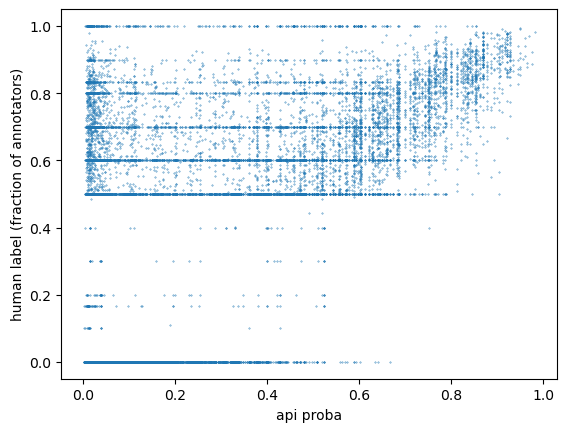

In [65]:
import matplotlib.pyplot as plt

plt.scatter(x=samples2['api_proba'], y=samples2['toxicity'], s=0.1)
plt.xlabel('api proba')
plt.ylabel('human label (fraction of annotators)')

Text(0, 0.5, 'human label (fraction of annotators)')

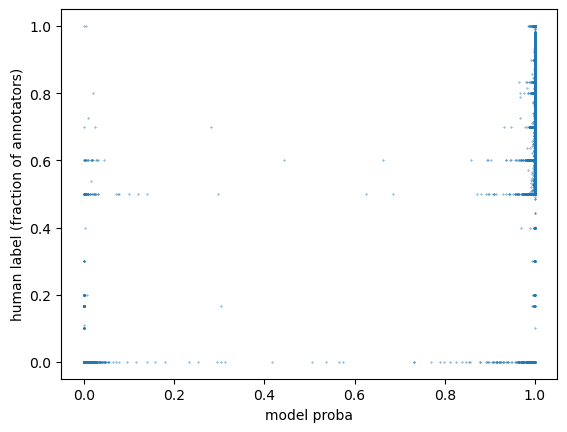

In [74]:
plt.scatter(x=samples2['mod_proba'], y=samples2['toxicity'], s=0.1)
plt.xlabel('model proba')
plt.ylabel('human label (fraction of annotators)')

In [90]:
pd.set_option('display.precision', 2)
# probe samples that have low api scores but high toxicity (label)
samples2.loc[(samples2['api_proba']<0.1) & (samples2['toxicity']>0.5),:].sort_values(by='toxicity_annotator_count', ascending=False)

,index,text,api_proba,label,mod_proba,comment_text,toxicity,toxicity_annotator_count,obscene,sexual_explicit,identity_attack,insult,threat
12842,14138,Not surprised. Most Russians are criminals an...,3.11e-02,1,1.0,Not surprised. Most Russians are criminals an...,0.92,1878,1.19e-01,1.17e-02,9.11e-01,0.90,1.06e-03
13775,60806,"Yeesh what is this world coming to. Oh no, so...",9.61e-02,1,1.0,"Yeesh what is this world coming to. Oh no, so...",0.90,1842,6.18e-01,1.14e-02,7.25e-01,0.89,6.51e-03
15334,62944,"I guess you forgot the meaning of ""Freedom of ...",3.78e-02,1,1.0,"I guess you forgot the meaning of ""Freedom of ...",0.85,1833,7.40e-01,1.36e-02,2.35e-01,0.83,4.91e-03
18894,16146,"No, you're not wrong. What you are is boorish...",2.60e-02,1,1.0,"No, you're not wrong. What you are is boorish...",0.96,1820,8.24e-03,5.49e-04,2.20e-03,0.95,2.20e-03
17531,56393,Of COURSE you have a choice. What garbage. Unb...,1.41e-02,1,1.0,Of COURSE you have a choice. What garbage. Unb...,0.93,1725,4.12e-02,5.80e-04,4.64e-03,0.91,4.87e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14832,23731,"""“No politician in history, and I say this wit...",4.98e-02,1,1.0,"""“No politician in history, and I say this wit...",1.00,4,0.00e+00,0.00e+00,0.00e+00,1.00,0.00e+00
15814,12399,Sorry Ken. I guess you shouldn't have nominate...,6.41e-03,1,1.0,Sorry Ken. I guess you shouldn't have nominate...,1.00,4,0.00e+00,0.00e+00,0.00e+00,1.00,0.00e+00
15806,15368,Democrats can reliably win the Peoples' Republ...,1.40e-02,1,1.0,Democrats can reliably win the Peoples' Republ...,1.00,4,0.00e+00,0.00e+00,0.00e+00,1.00,0.00e+00
19241,42145,You will find the same thing on any article th...,8.86e-03,1,1.0,You will find the same thing on any article th...,1.00,4,0.00e+00,0.00e+00,0.00e+00,1.00,0.00e+00


In [81]:
print(samples2.loc[12842, "text"])
print(samples2.loc[12842, "text"])

Not surprised.  Most Russians are criminals and their women are skanks and users...


In [73]:
samples2.loc[13775, "text"]

"Yeesh what is this world coming to.  Oh no, someone called me a Canuck the other day, my feelings are now hurt, I better take time off work and sue someone.\nMy apology would have gone like this:  I'm very sorry you are a bunch of queers!!!!"

In [77]:
samples2.loc[15806, "text"]

"Democrats can reliably win the Peoples' Republic of Juneau's downtown district, a couple or three districts in Anchorage, downtown, the U-Med, and East Anchorage, a district or two in Fairbanks, and a couple of rural districts.   It's been that way for thirty years.   Sometimes the Ds come up with a particularly attractive candidate that can win in some other districts and sometimes they put up candidates that sound more like conservatives than most Republicans do.   All the Democrat efforts in redistricting have been to try to dilute solidly Republican areas so they have some hope of coalitions.   Now their toy is false-flag Republicans backed by the Democrats for districts where a D is the kiss of death.   You lefties liked gerrymandering when Knowles led the reapportionment in '00.   Hypocrites!"